# Import Required Libraries

In [ ]:
import os
import numpy as np
import pandas as pd # For data manipulation, reading from csv file
import requests
#import ssl
from PIL import Image
#from urllib.request import urlopen
#from tqdm import tqdm
from IPython.display import Image, display # To display url images in jupyter notebook
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications.vgg16 import preprocess_input
#from io import BytesIO
#from urllib.parse import urlparse, urlunparse


# Import Data from CSV

In [ ]:
file_path = 'Data ID.csv'
df = pd.read_csv(file_path)


In [ ]:
df

,Product ID,image_link
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...
...,...,...
2069,2070,https://cdn.shopify.com/s/files/1/0184/5074/33...
2070,2071,https://cdn.shopify.com/s/files/1/0184/5074/33...
2071,2072,https://cdn.shopify.com/s/files/1/0184/5074/33...
2072,2073,https://cdn.shopify.com/s/files/1/0184/5074/33...


# Displaying the Data

In [ ]:
df['image_link'][77]

'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/USGZ-058-B.jpg?v=1644898682'

In [ ]:
# Replace 'your_image_url' with the actual URL of the image
image_url = df['image_link'][77]

# Display the image
display(Image(url=image_url))

# Getting all the links of the images

In [ ]:
image_links = df['image_link'].tolist()

In [ ]:
image_links

['https://cdn.shopify.com/s/files/1/0464/1731/3955/files/02_1df8d5d7-138d-483e-99ff-1bf54b5b8c56.jpg?v=1690521019',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/LGEND100ML-MULTIc.jpg?v=1639724606',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/AZLAN100ML-MULTIc.jpg?v=1639724588',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/eyebcm312a-black.jpg?v=1600933349',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/eyhdm-303-black.jpg?v=1600933353',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/eyllc-406-black.jpg?v=1600933355',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/fampb-470-1.jpg?v=1600933364',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/scqmss-558-1.jpg?v=1600933365',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/files/01_82493f1e-238c-4ab0-bed6-414ab5e7bf43.jpg?v=1689316635',
 'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/ihsan065ml-multi.jpg?v=1604404762',
 'https:/

In [ ]:
image_links_1 = image_links[0]

In [ ]:
image_links_1

'https://cdn.shopify.com/s/files/1/0464/1731/3955/files/02_1df8d5d7-138d-483e-99ff-1bf54b5b8c56.jpg?v=1690521019'

# Download Images in a Folder

In [ ]:
output_folder = r'C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images'
os.makedirs(output_folder, exist_ok=True)

# Download and Save Images
for index, row in df.iterrows():
    image_url = row['image_link']  # dataframe column
    response = requests.get(image_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Creating a unique filename based on the index. You can have any other identifier
        image_filename = f"{index}_image.jpg"  # You can adjust the filename as needed
        image_path = os.path.join(output_folder, image_filename)

        # Save the image to the specified folder
        with open(image_path, 'wb') as f:
            f.write(response.content)
    else:
        print(f"Failed to download image from {image_url}")

print("Image download and save process completed.")

# Folder containing your images

In [ ]:
image_folder = r'C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images'


# Load pretrained VGG16 model

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image

In [ ]:
def extract_features(image_path):
    img = image.load_img(image_path)
    img = img.resize((224, 224))  # Resize to match VGG16 input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    return features.flatten()

In [ ]:
# Create a list to store image paths and corresponding features
image_paths = []
features = []

# Iterate through images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(image_folder, filename)
        image_paths.append(image_path)

        # Extract features
        image_feature = extract_features(image_path)
        features.append(image_feature)


1/1 [==============================] - 1s 798ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 531ms/step


1/1 [==============================] - 1s 553ms/step


1/1 [==============================] - 1s 578ms/step


1/1 [==============================] - 1s 578ms/step


In [ ]:
# Convert the lists to NumPy arrays
X = np.array(features)

# Fit a KNN model

In [ ]:
knn = NearestNeighbors(n_neighbors=6, metric='cosine')
knn.fit(X)


NearestNeighbors(metric='cosine', n_neighbors=6)

# Function to find similar products

In [ ]:
def find_similar_products(query_image_path):
    similar_images_path = []
    # Extract features from the query image
    query_feature = extract_features(query_image_path)

    # Reshape the query feature for prediction
    query_feature = query_feature.reshape(1, -1)

    # Find the nearest neighbors
    distances, indices = knn.kneighbors(query_feature)

    # Display the 5 most similar products
    for i in range(1, len(indices[0])):
        similar_image_path = image_paths[indices[0][i]]
        print(f"Similar Product {i}: {similar_image_path}")
        similar_images_path.append(similar_image_path)

    return similar_images_path



In [ ]:
# Example: Query an image and find similar products
query_image_path = r'C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\72_image.jpg'


predicted_images = find_similar_products(query_image_path)

1/1 [==============================] - 0s 402ms/step
Similar Product 1: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\77_image.jpg
Similar Product 2: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\318_image.jpg
Similar Product 3: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\1434_image.jpg
Similar Product 4: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\324_image.jpg
Similar Product 5: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\1433_image.jpg


In [ ]:
predicted_images

['C:\\Users\\Annas Rahil\\Desktop\\Jupyter Notebook\\Knowledge Stream\\Mini Projects\\images\\77_image.jpg',
 'C:\\Users\\Annas Rahil\\Desktop\\Jupyter Notebook\\Knowledge Stream\\Mini Projects\\images\\318_image.jpg',
 'C:\\Users\\Annas Rahil\\Desktop\\Jupyter Notebook\\Knowledge Stream\\Mini Projects\\images\\1434_image.jpg',
 'C:\\Users\\Annas Rahil\\Desktop\\Jupyter Notebook\\Knowledge Stream\\Mini Projects\\images\\324_image.jpg',
 'C:\\Users\\Annas Rahil\\Desktop\\Jupyter Notebook\\Knowledge Stream\\Mini Projects\\images\\1433_image.jpg']

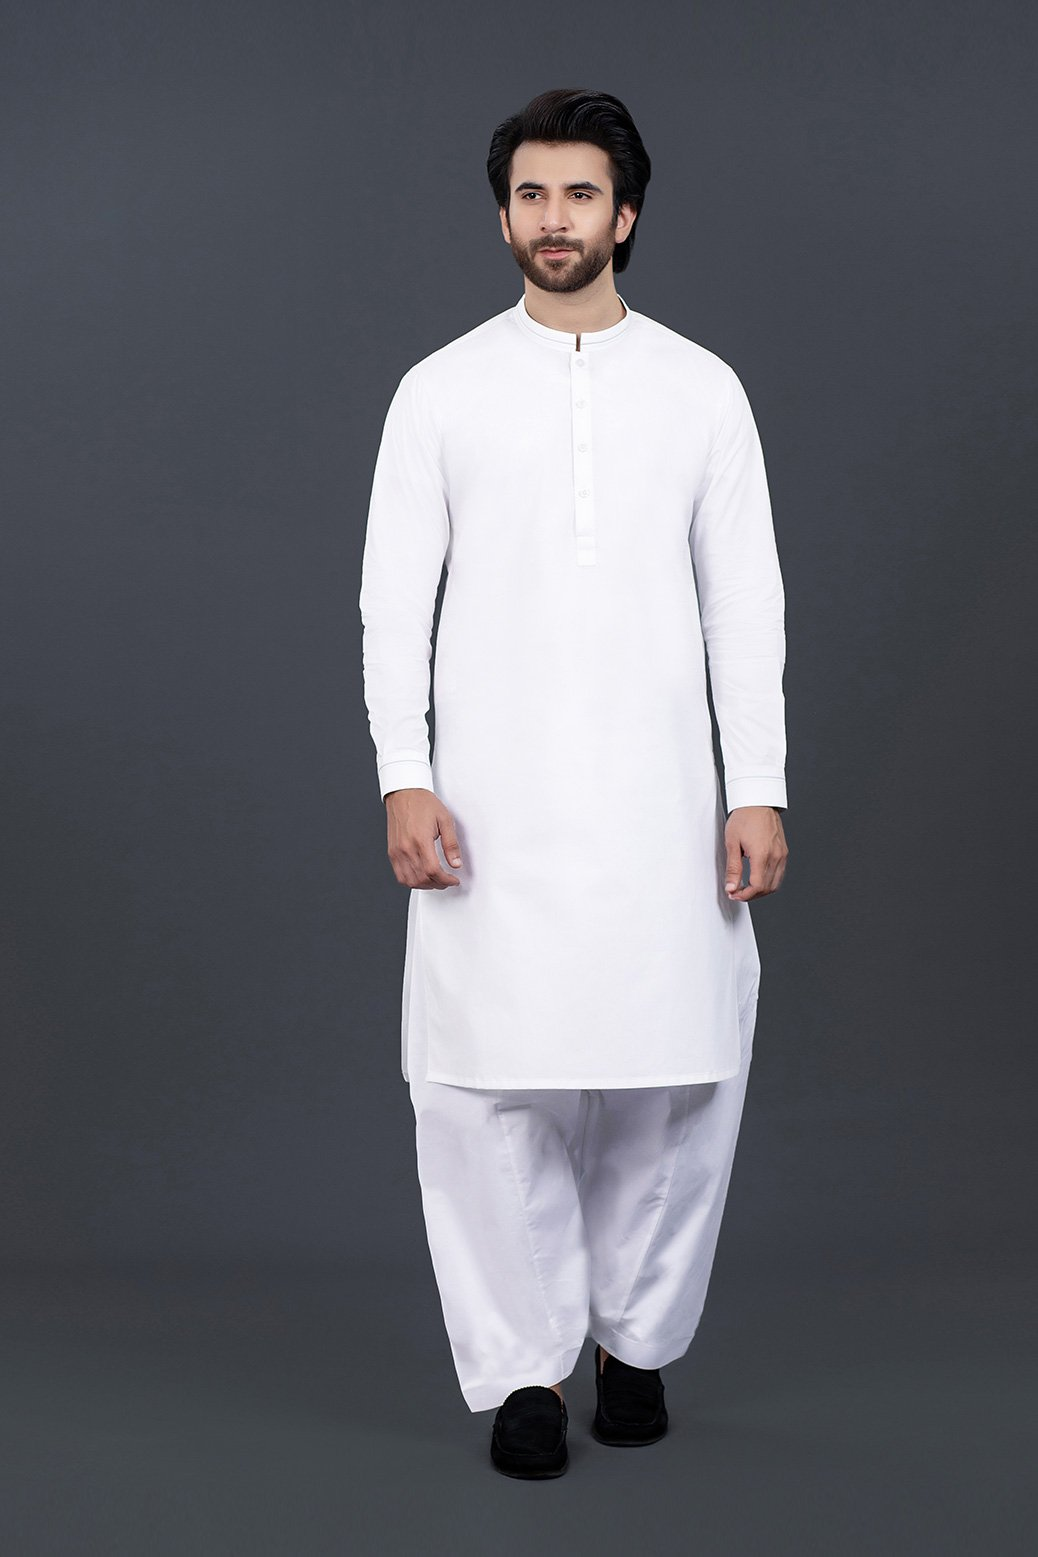

In [ ]:
image_path = r'C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\72_image.jpg'

# Display the image
display(Image(filename=image_path))

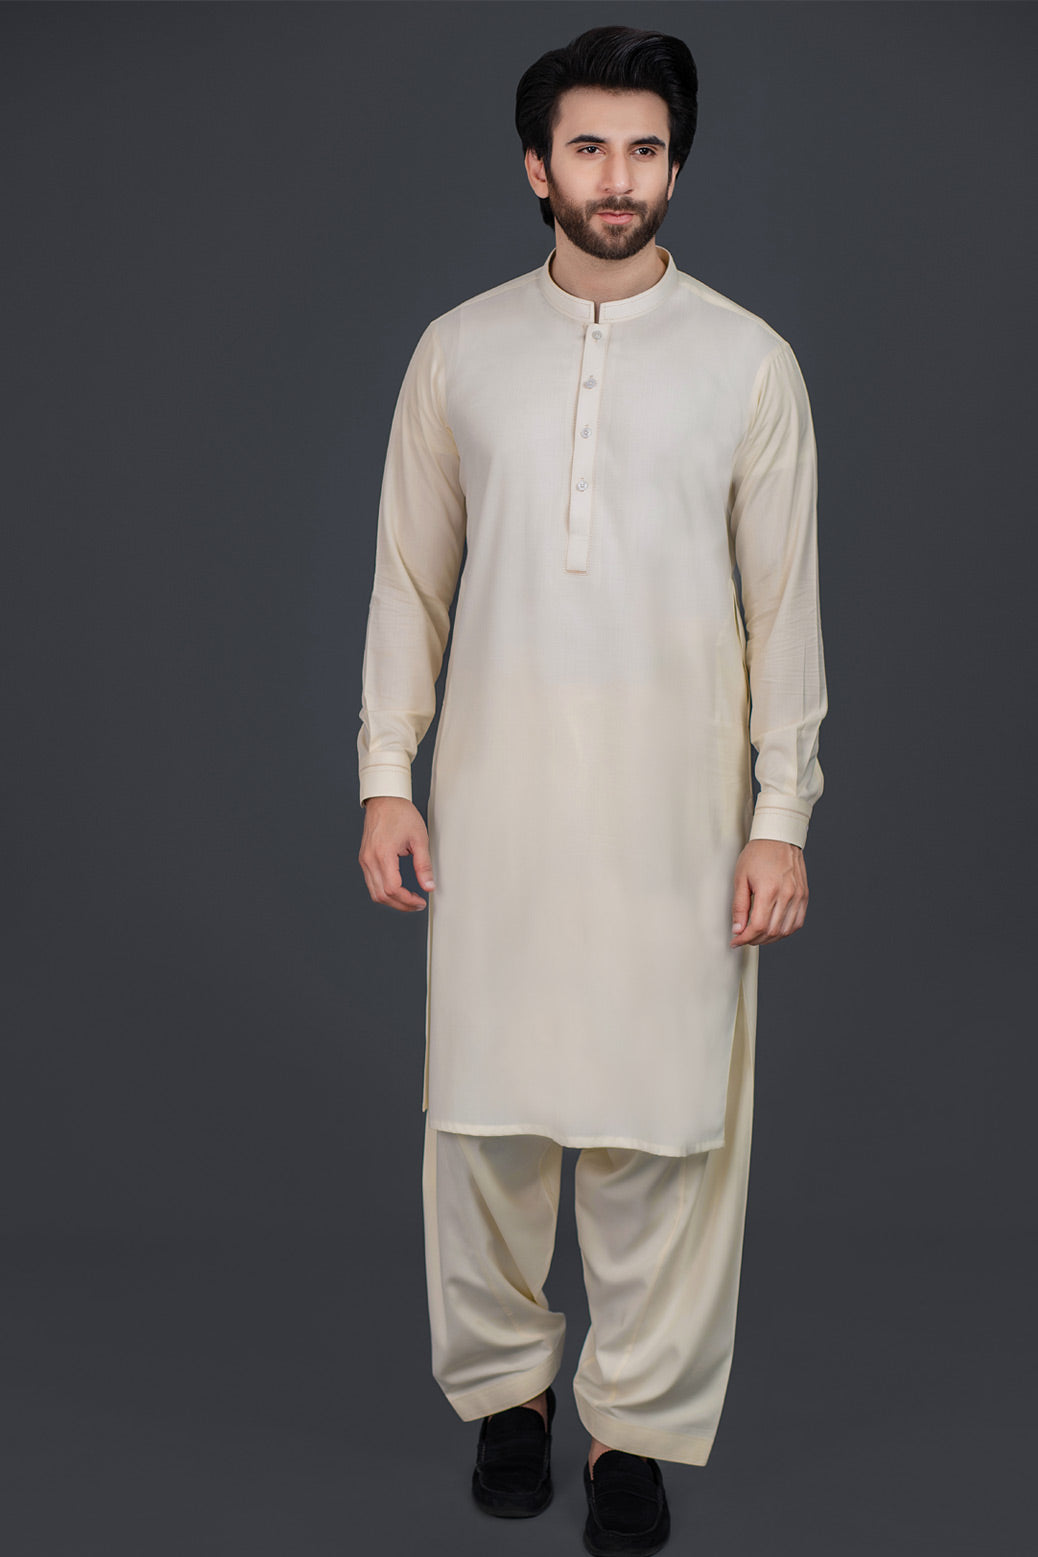

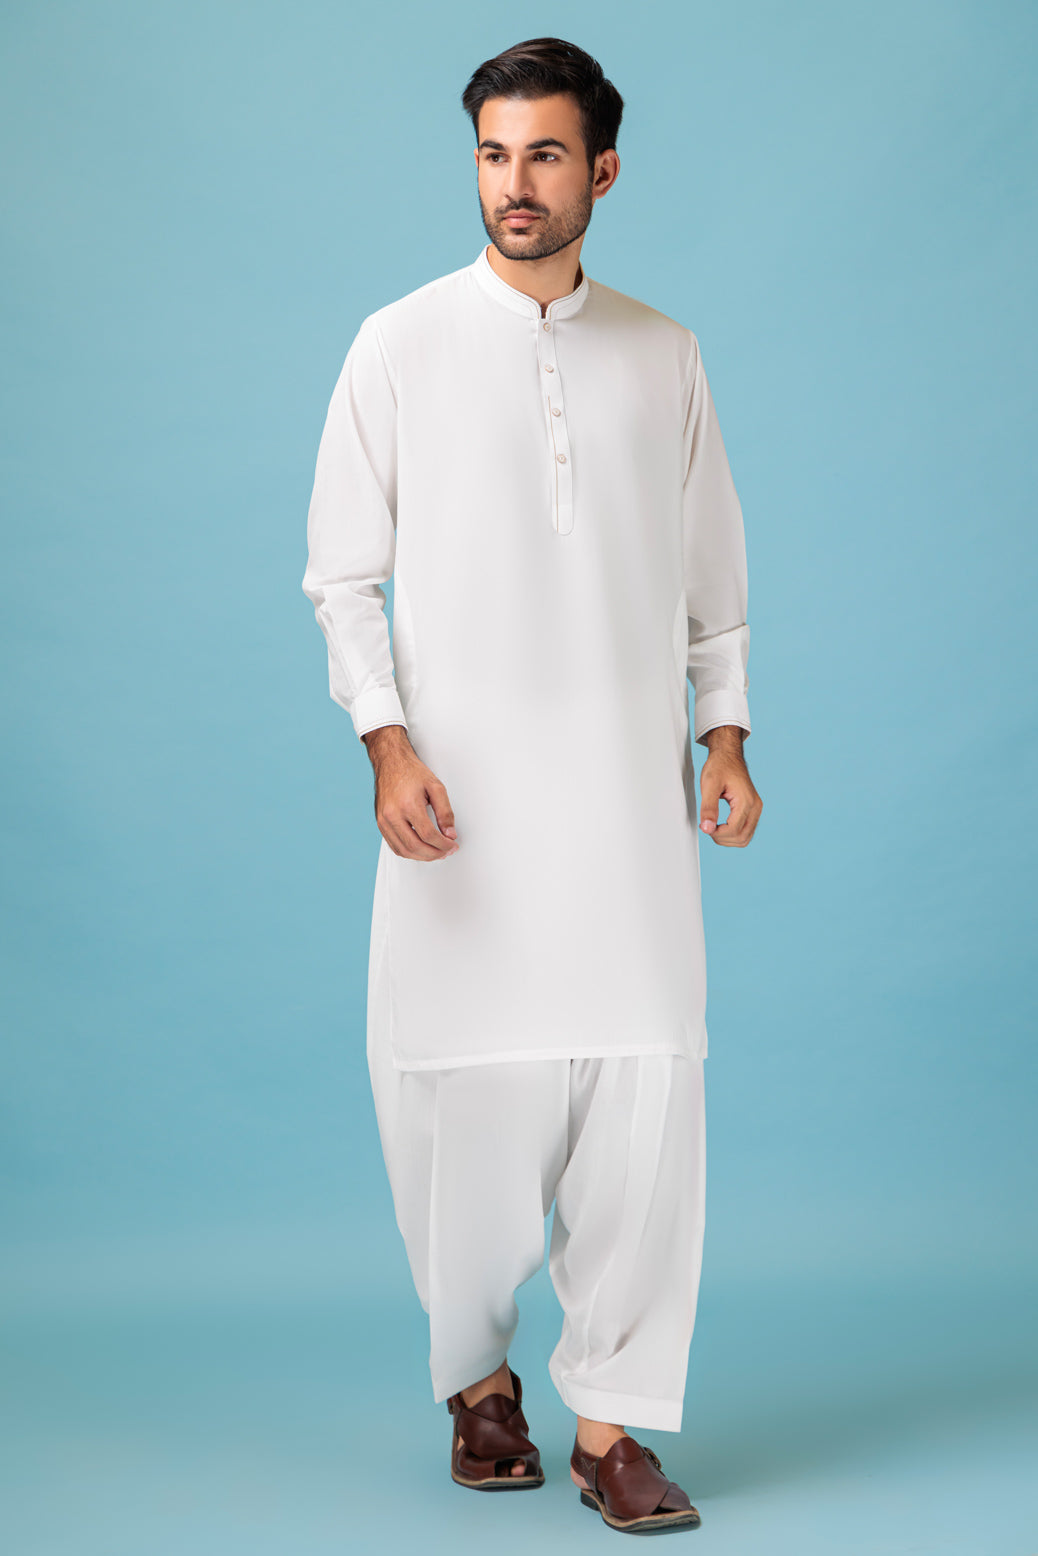

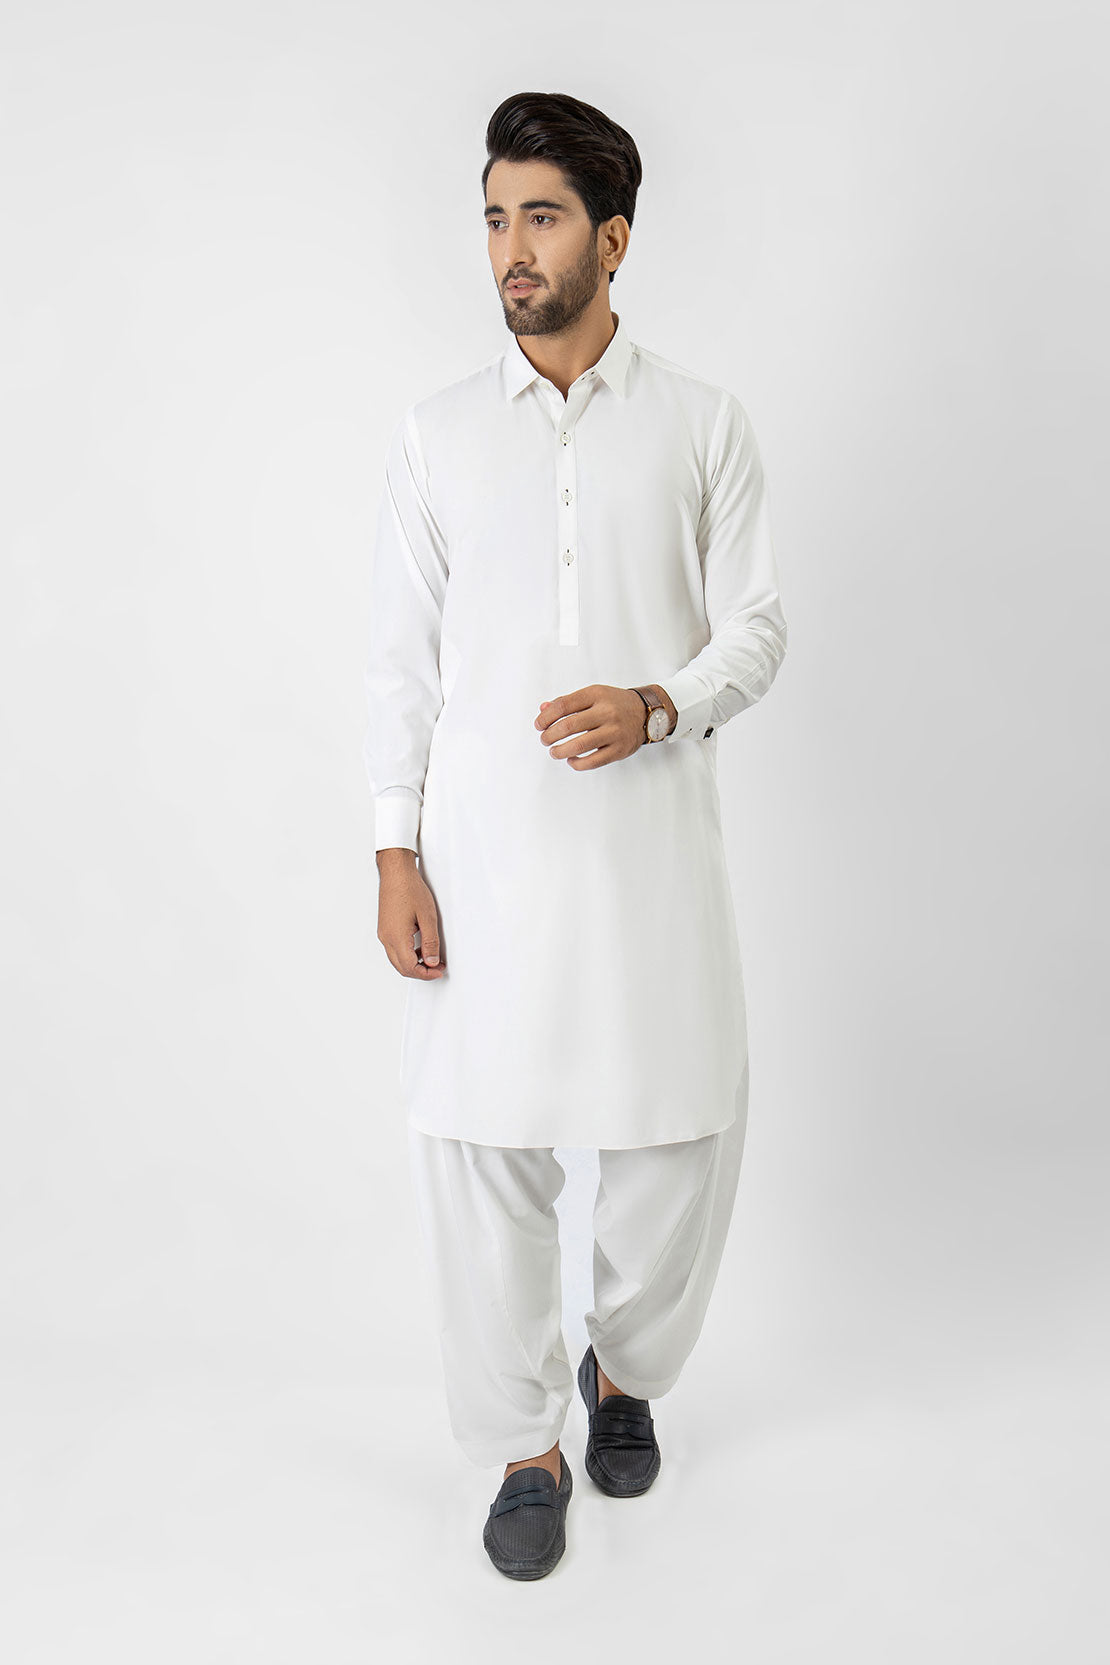

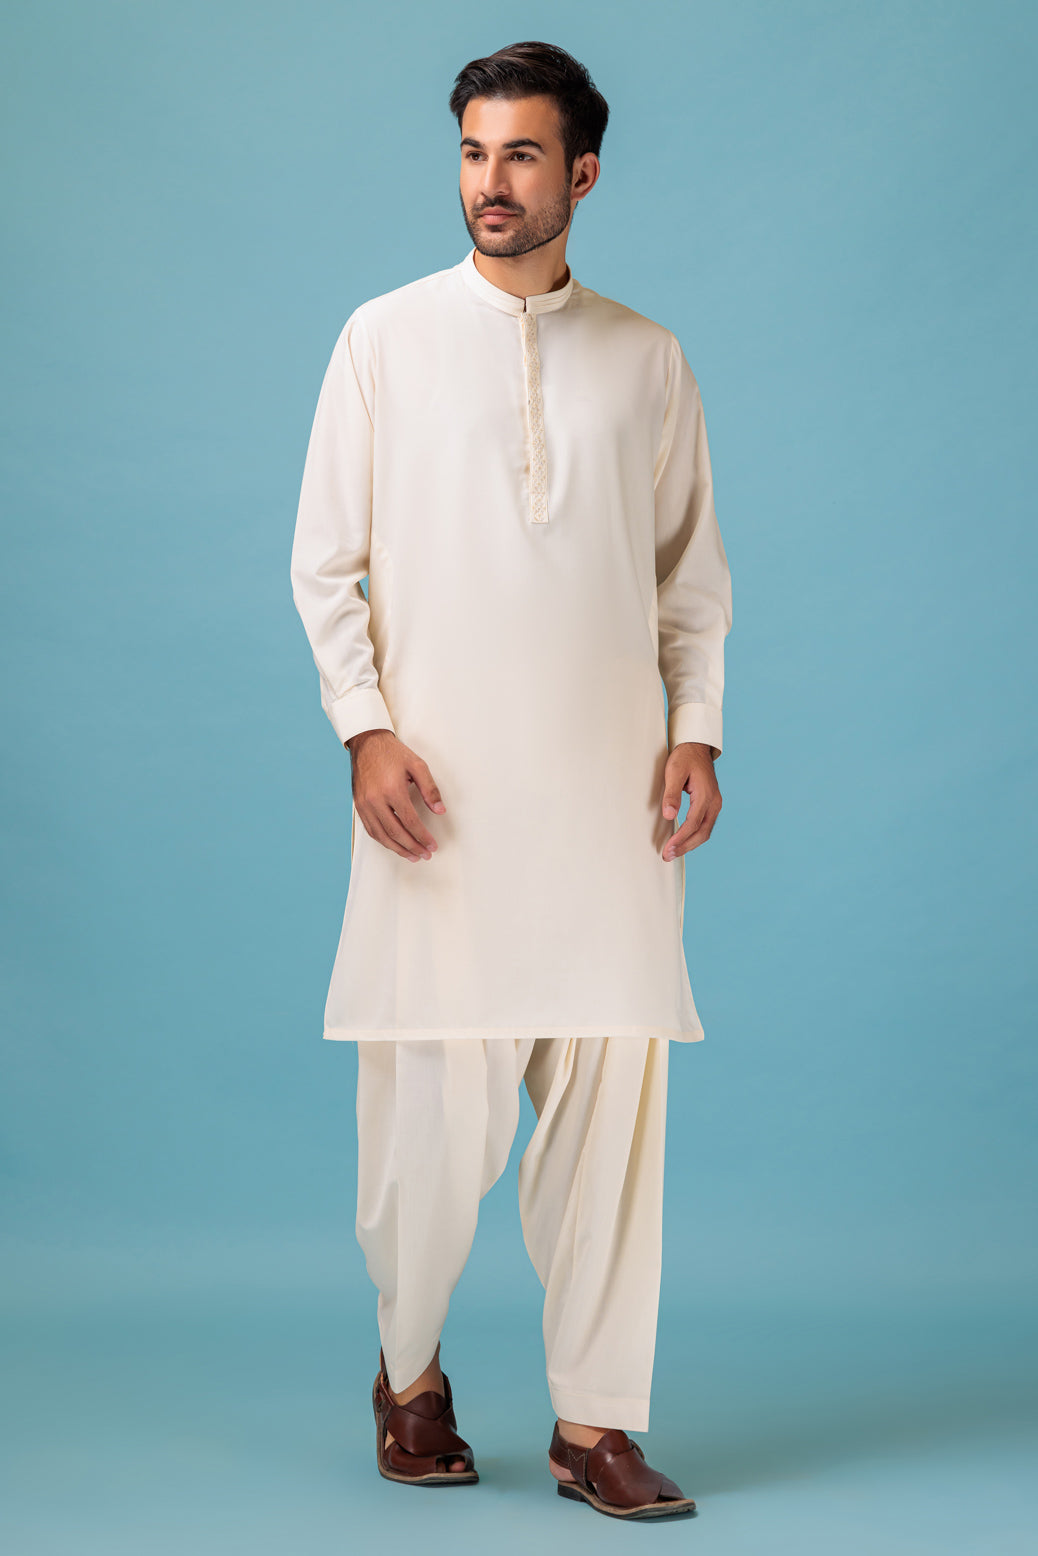

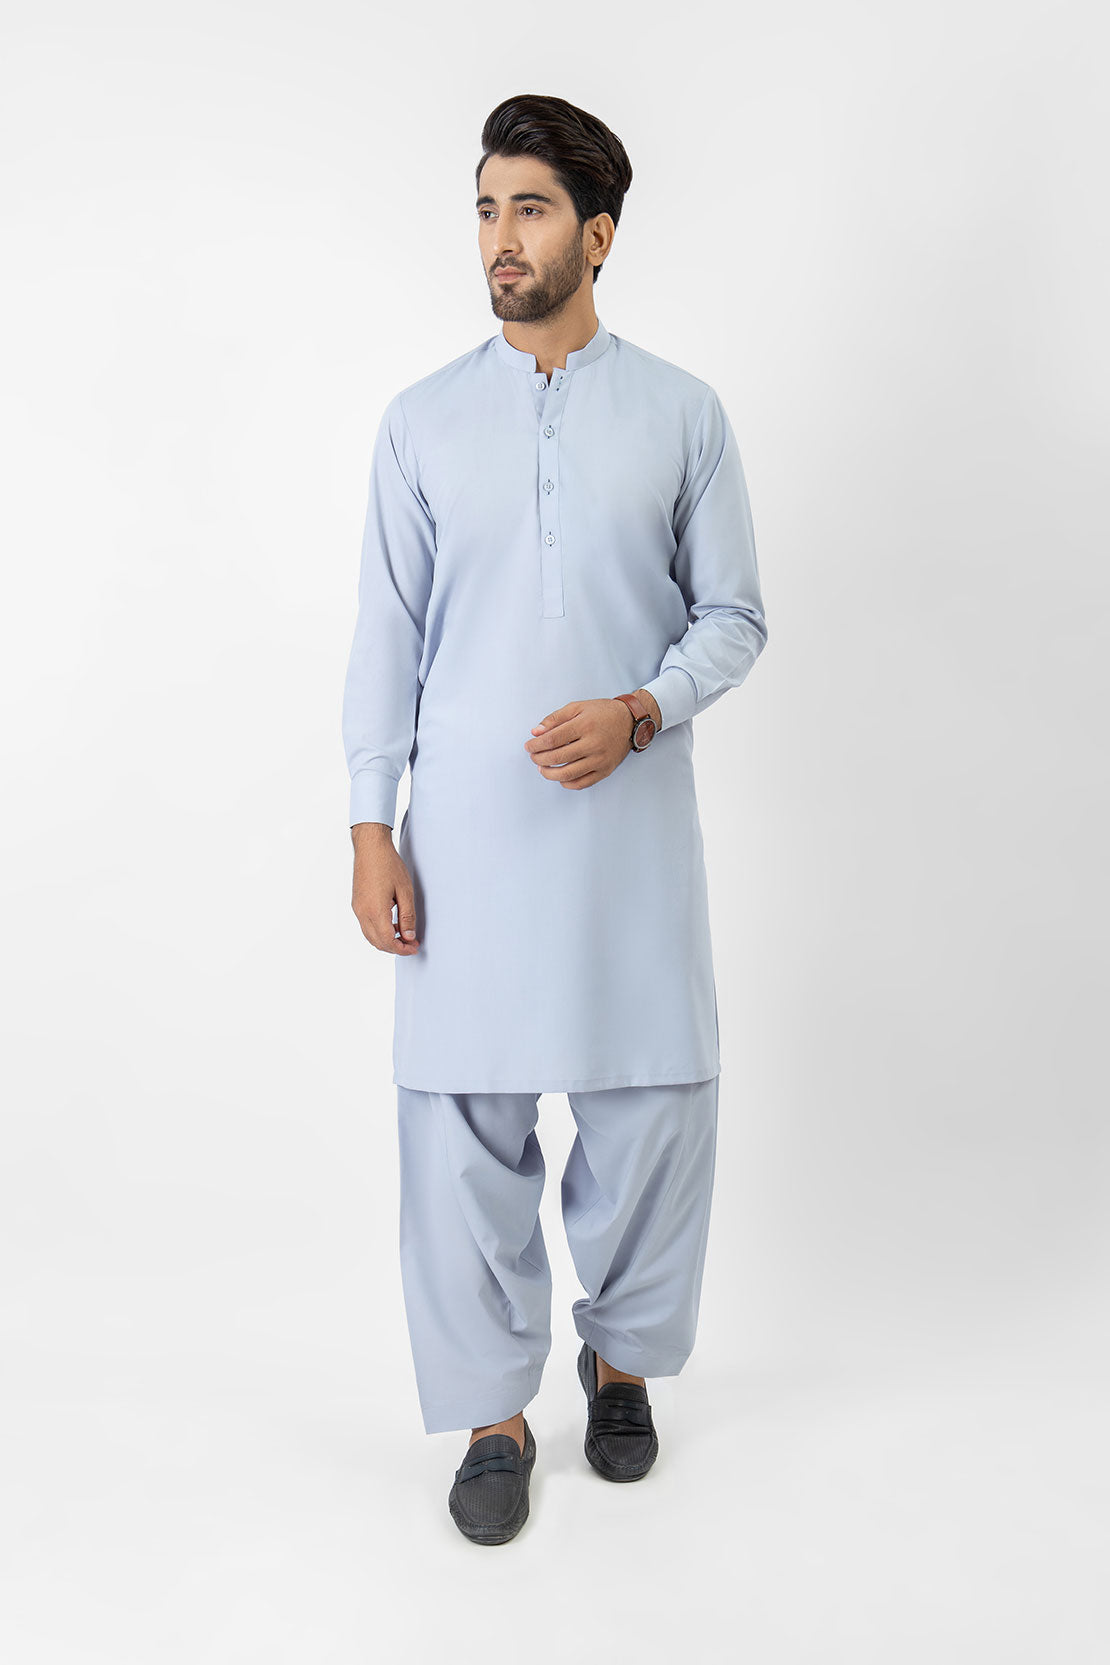

In [ ]:
# Display each image in the folder
for image_file in predicted_images:
    display(Image(image_file))


In [ ]:
# Example: Query an image and find similar products
query_image_path = r'C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\0_image.jpg'


predicted_images = find_similar_products(query_image_path)

1/1 [==============================] - 0s 330ms/step
Similar Product 1: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\424_image.jpg
Similar Product 2: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\1_image.jpg
Similar Product 3: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\78_image.jpg
Similar Product 4: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\92_image.jpg
Similar Product 5: C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\56_image.jpg


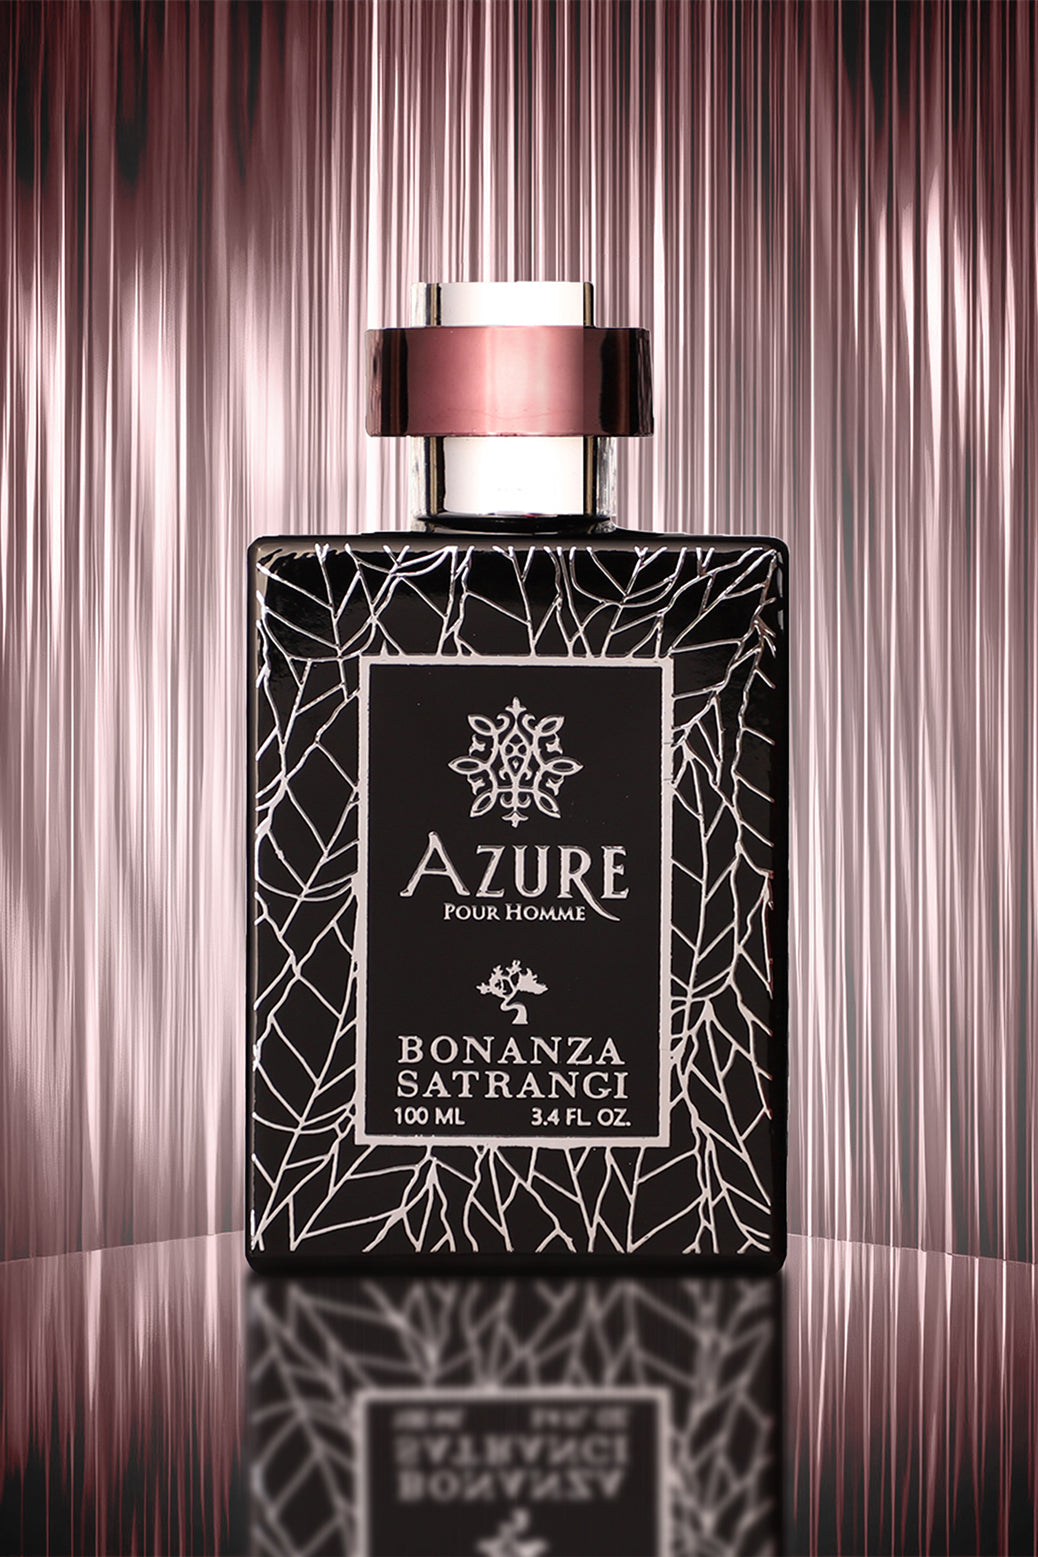

In [ ]:
image_path = r'C:\Users\Annas Rahil\Desktop\Jupyter Notebook\Knowledge Stream\Mini Projects\images\0_image.jpg'

# Display the image
display(Image(filename=image_path))

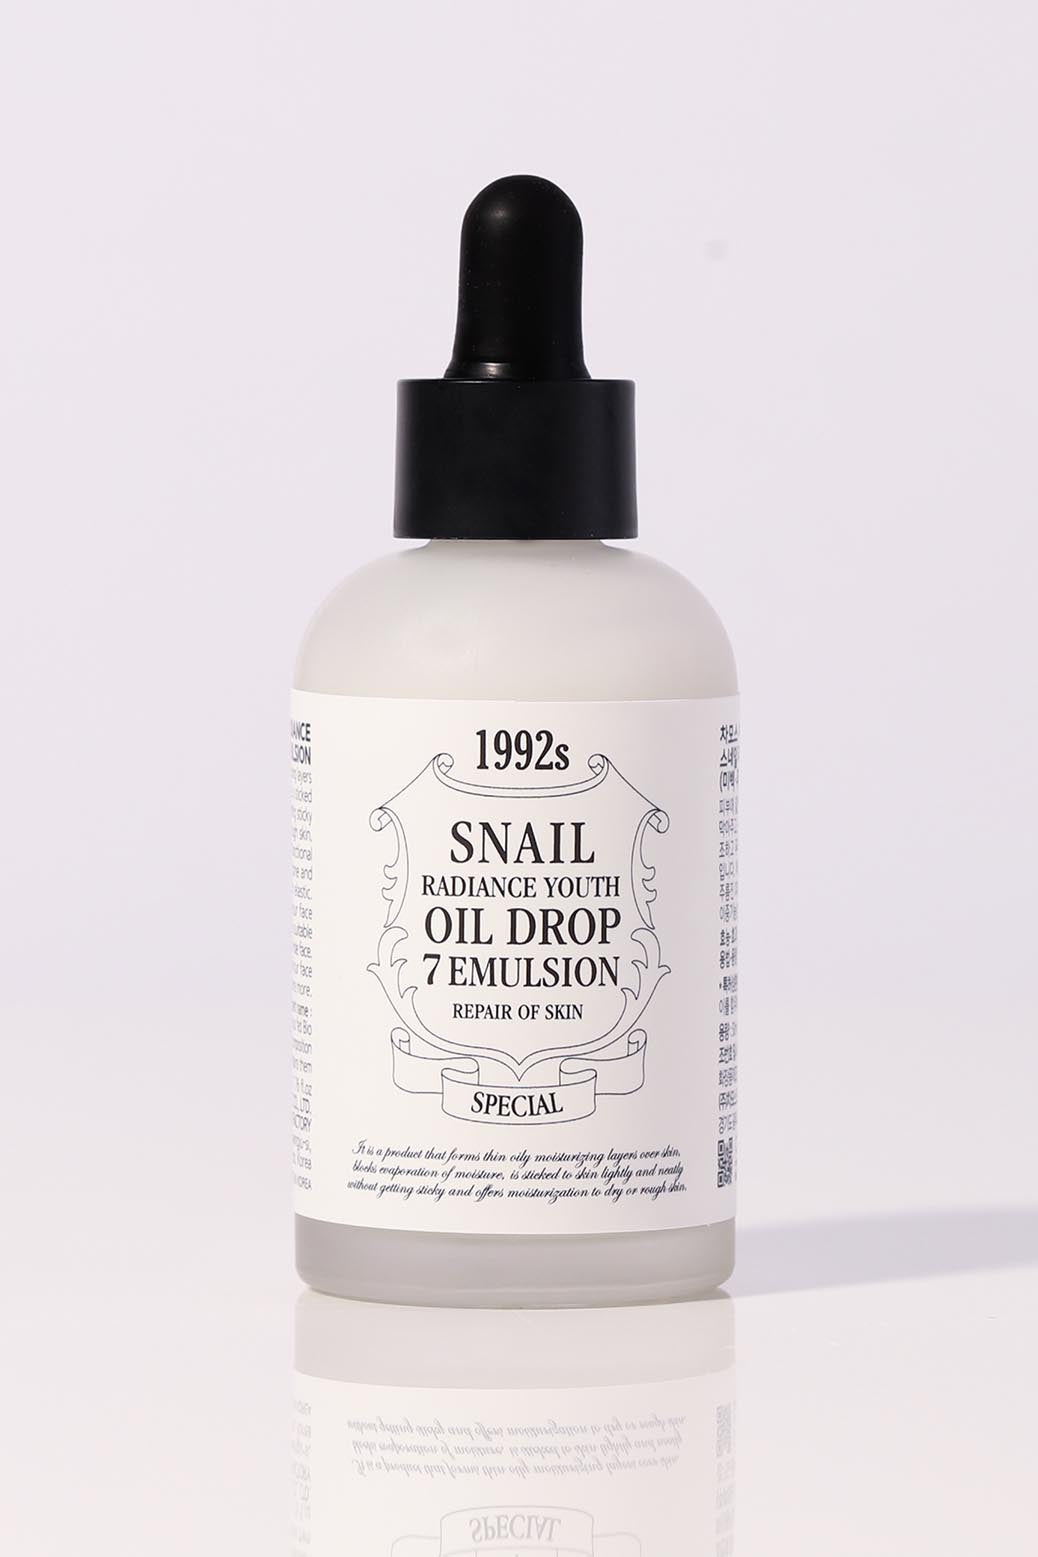

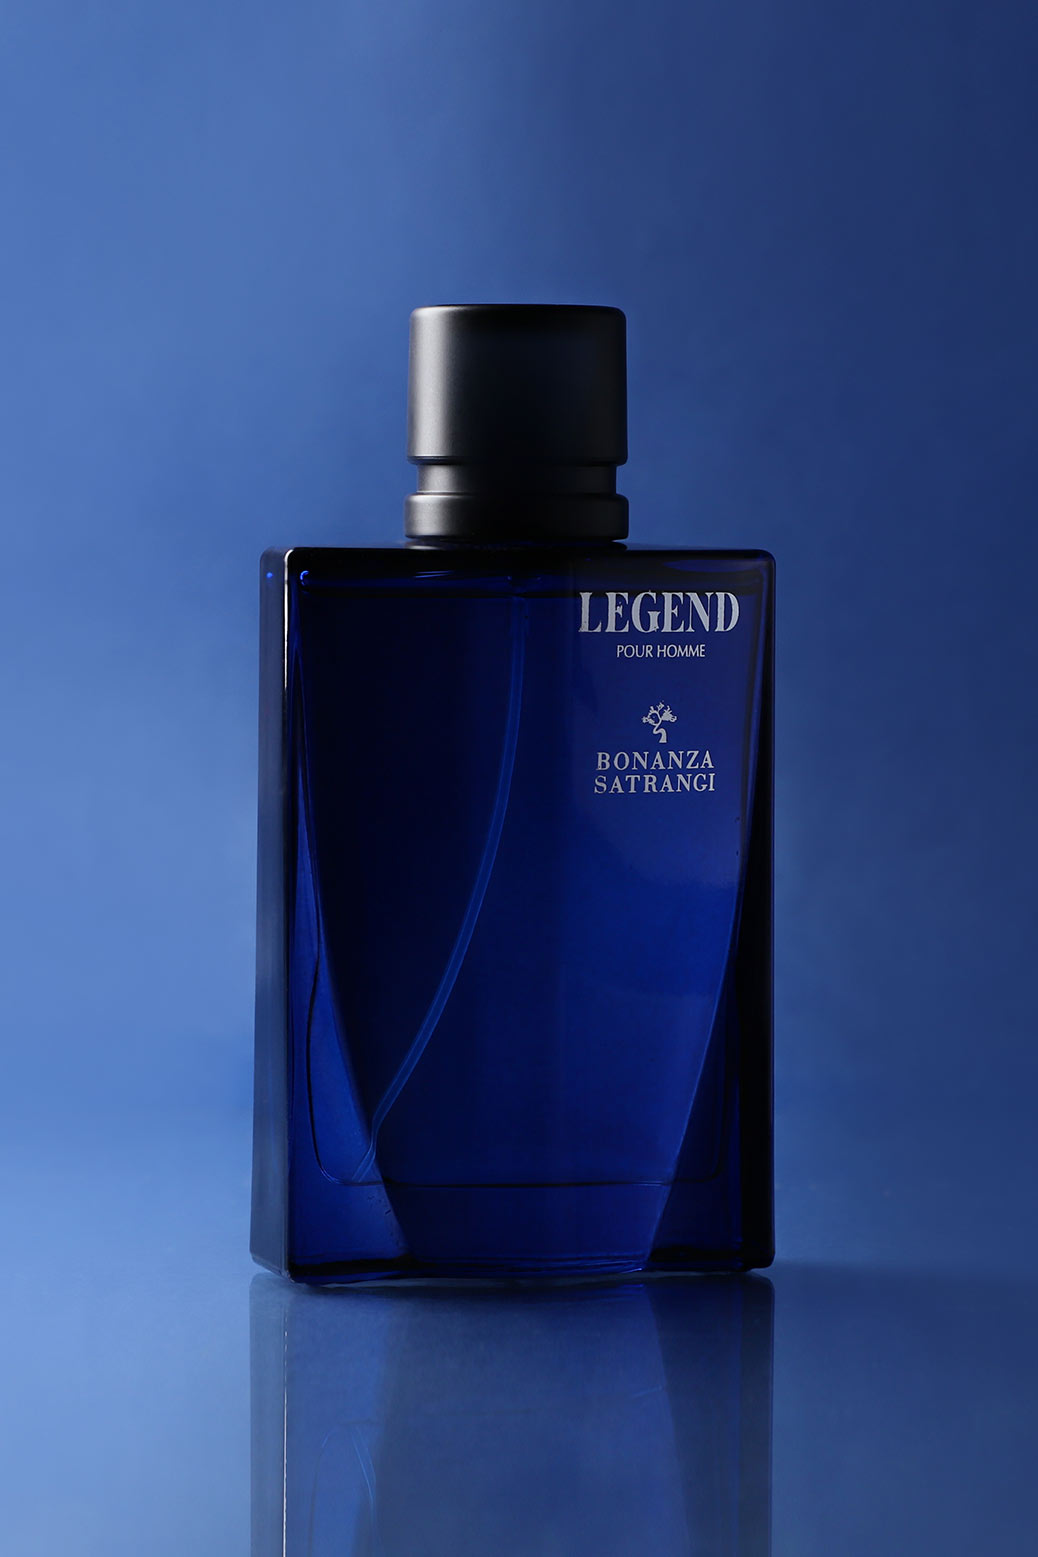

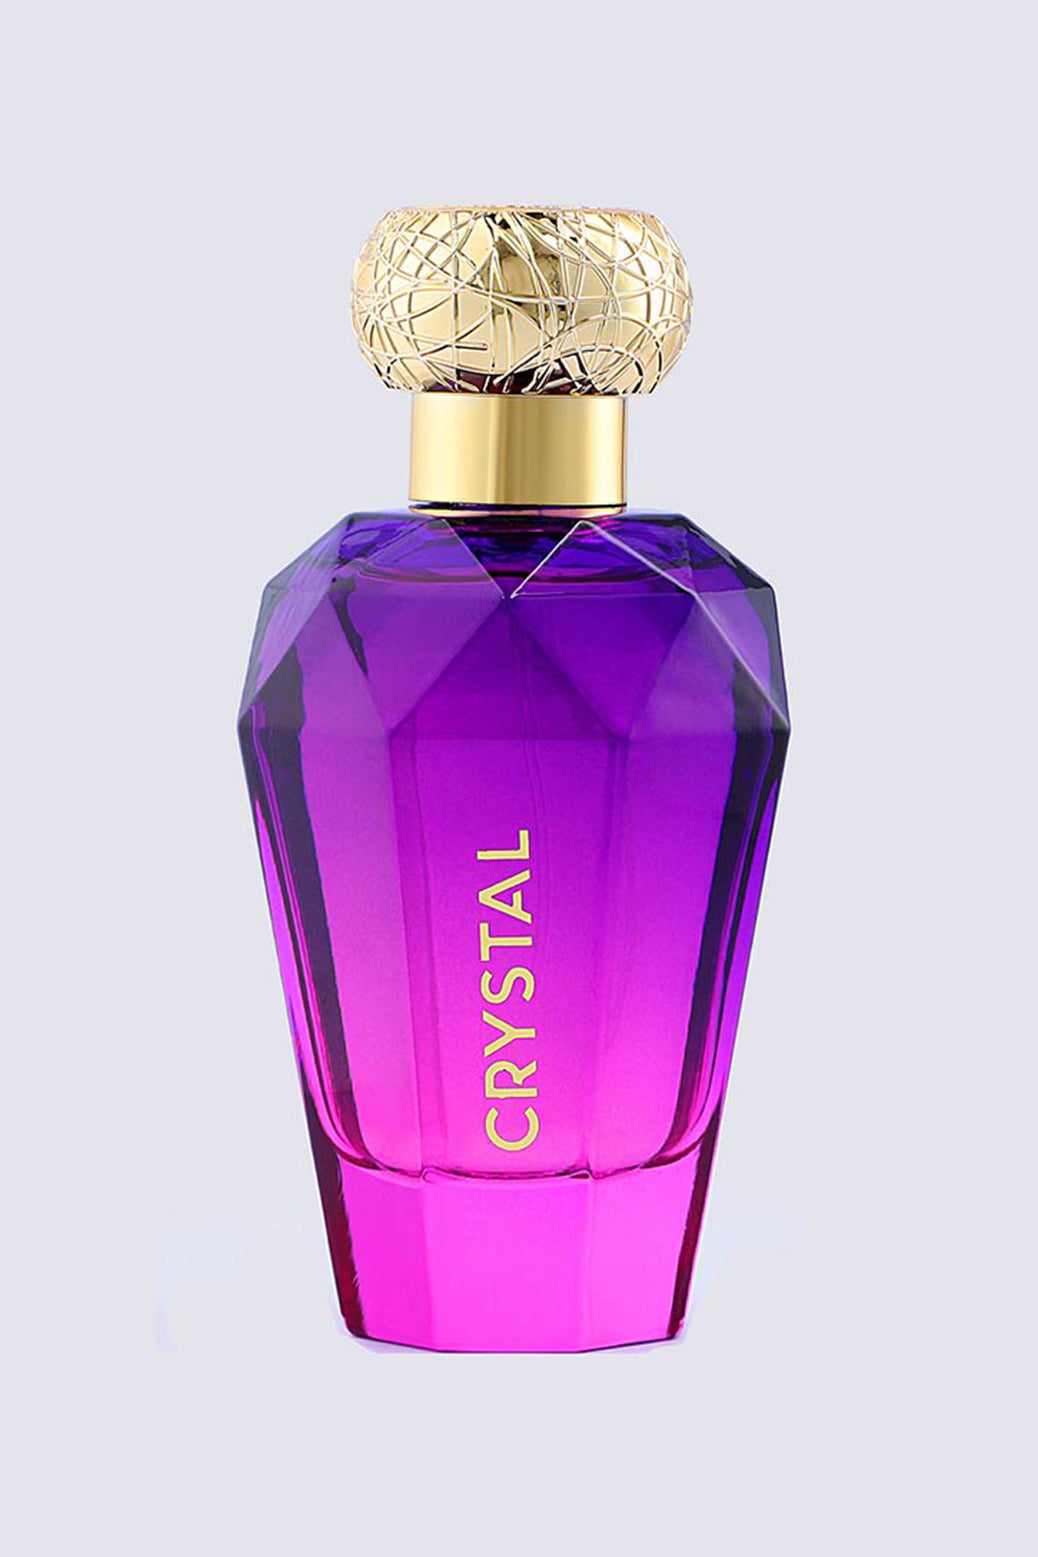

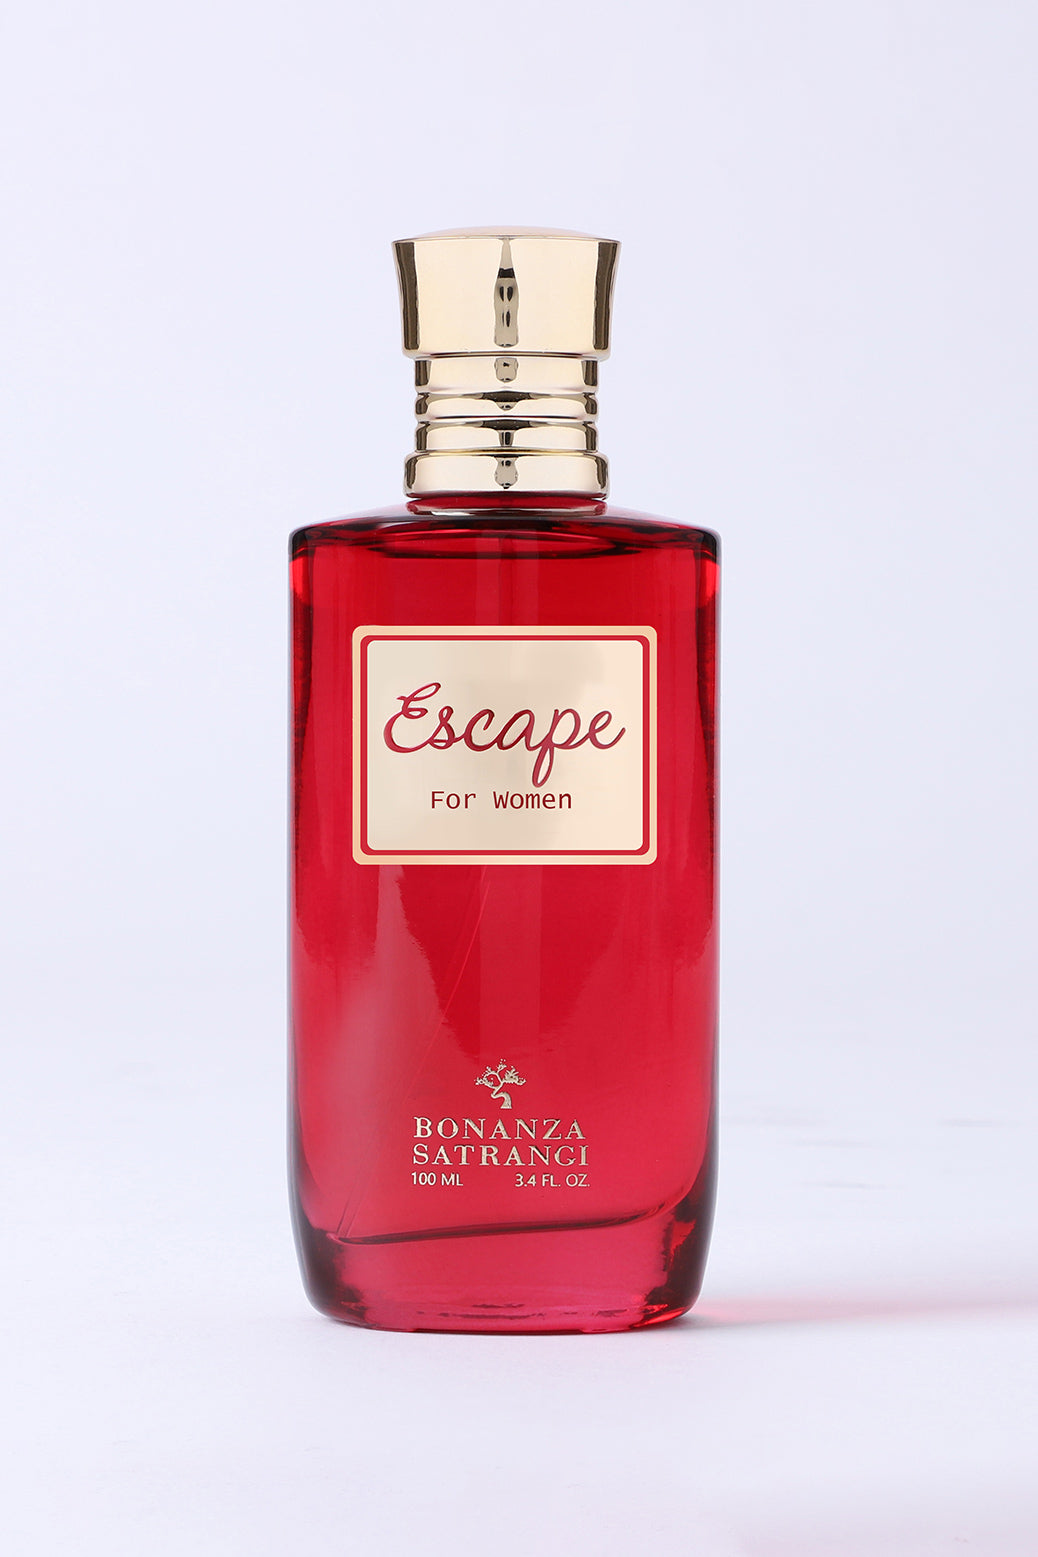

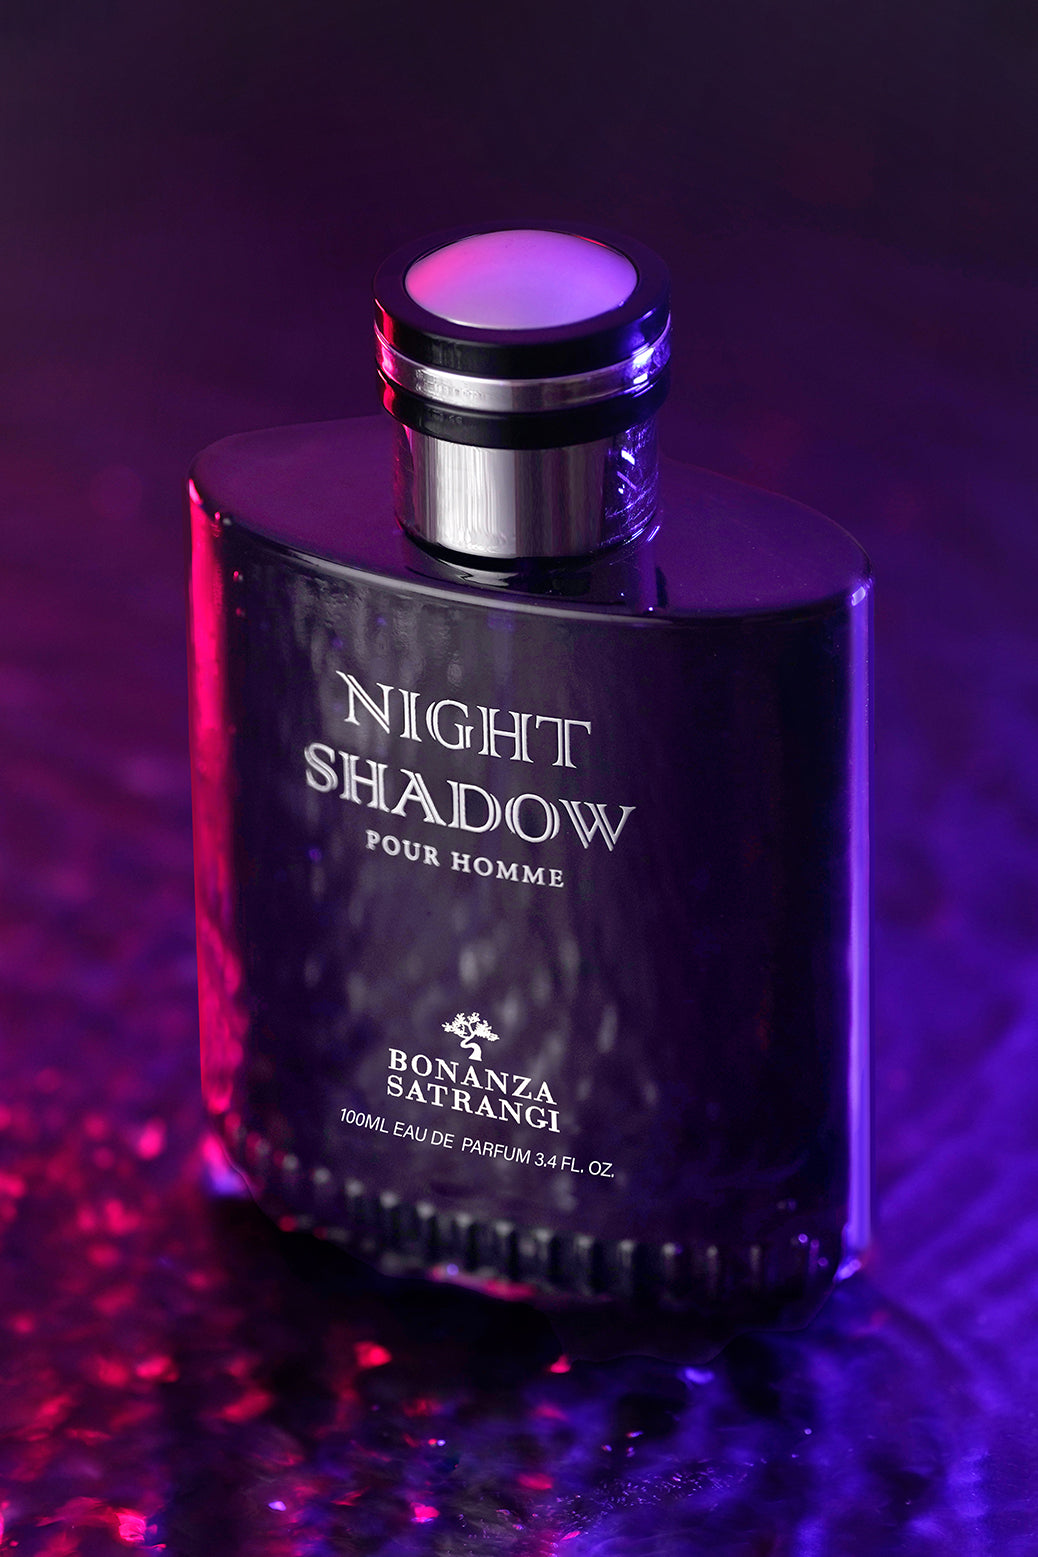

In [ ]:
# Display each image in the folder
for image_file in predicted_images:
    display(Image(image_file))


In [ ]:
images_folder = 'path_to_your_images_folder'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Display each image in the folder
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    display(Image(filename=image_path))


# Load and preprocess images with handling broken image links

In [ ]:
# Preprocess Image Function
def preprocess_image(url, target_size=(224, 224)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    # Add more preprocessing steps as needed
    return img

# Example: Resizing images to 224x224
target_size = (224, 224)
processed_images = []

for index, row in df.iterrows():
    image_url = row['image_link']  # Replace with the actual column name containing image URLs
    img = preprocess_image(image_url, target_size)
    processed_images.append(img)


In [ ]:
def is_valid_url(url):
    try:
        result = urlparse(url)
        return all([result.scheme, result.netloc])
    except ValueError:
        return False

def load_and_preprocess_images(image_links):
    images = []

    for link in tqdm(image_links, desc="Loading and preprocessing images"):
        try:
            if not is_valid_url(link):
                print(f"Invalid URL: {link}")
                continue

            response = requests.get(link)
            if response.status_code == 200:
                image = Image.open(BytesIO(response.content))
                image = image.resize((224, 224))  # Resize to match VGG16 input size
                image_array = np.asarray(image)
                images.append(image_array)
            else:
                print(f"Error loading image from {link}. Status code: {response.status_code}")
        except Exception as e:
            print(f"Error loading image from {link}: {e}")

    if len(images) == 0:
        raise ValueError("No valid images were loaded. Check your image links.")

    images = np.array(images)
    images = preprocess_input(images)

In [ ]:
images = load_and_preprocess_images( df['image_link'][77]) # Preprocessing

In [ ]:
def load_and_preprocess_images(image_links):
     # Disable SSL certificate verification due to error encountered, [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate
    ssl._create_default_https_context = ssl._create_unverified_context

    for link in tqdm(image_links, desc="Loading and preprocessing images"):
        try:
            response = requests.get(link)
            image = Image.open(BytesIO(response.content))
            image = image.resize((224, 224))  # Resize to match VGG16 input size
            image_array = np.asarray(image)
            images.append(image_array)
        except Exception as e:
            print(f"Error loading image from {link}: {e}")

    images = np.array(images)
    images = preprocess_input(images)

    return images



# Extract features using a pretrained model (VGG16)

In [ ]:
def extract_features(images):
    model = VGG16(weights='imagenet', include_top=False)
    features = model.predict(images, verbose=1)
    features = features.reshape((len(features), -1))
    return features



In [ ]:
images = load_and_preprocess_images(image_links) # Preprocessing
features = extract_features(images) # Feature Extraction


# Building and training a KNN model:

In [ ]:
knn_model = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
knn_model.fit(features)


# Function that recommend similar products

In [ ]:
def recommend_similar_products(image_link):
    try:
        product_image = Image.open(image_link)
        product_image = product_image.resize((224, 224))
        product_image_array = np.asarray(product_image)
        product_image_array = np.expand_dims(product_image_array, axis=0)
        product_image_array = preprocess_input(product_image_array)

        product_feature = extract_features(product_image_array)

        _, indices = knn_model.kneighbors(product_feature, n_neighbors=5)
        similar_products = df.iloc[indices[0]]['Product ID'].tolist()

        return similar_products

    except Exception as e:
        print(f"Error processing product image: {e}")


product_image_link = df['image_link'][77]
similar_products = recommend_similar_products(product_image_link)
print("Similar Products:", similar_products)
